In [1]:
from __future__ import print_function
import glob, os
import pandas as pd
import numpy as np
import cPickle as pickle

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import IPython.display

import librosa
import librosa.display

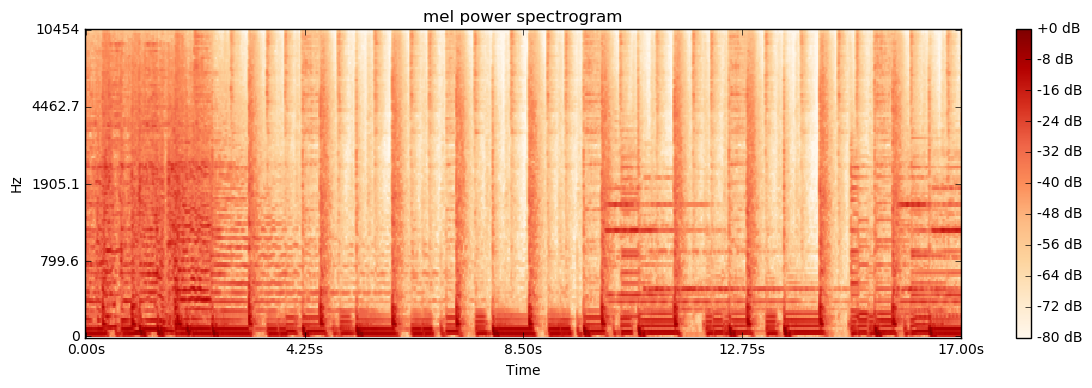

In [9]:
audio_path = '/home/laol/pressfoto/test.wav'
y, sr = librosa.load(audio_path)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.logamplitude(S, ref_power=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Convert To Mel

In [4]:
countTrainData = 3886


train = np.empty(0)


columns = ["Angry", "Tense", "Sad", "Happy"]
target = pd.DataFrame(index=range(countTrainData), columns=columns)
target = target.fillna(0)


i = 0


pathForClass = "/home/laol/pressfoto/data/Splited/"
os.chdir(pathForClass)
for file in glob.glob("*.wav"):
    audio_path = '/home/laol/pressfoto/data/Splited/' + file
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)

    if(i == 0):
        train = (log_S + 40.) / 80. #[-1;1]
    else:
        if(i == 1):
            train = np.array([train, (log_S + 40.) / 80.])
        else:
            train = np.append(train, (( log_S + 40.) / 80. ).reshape(1, 128, 733), axis=0)
            
    
    if(file[1] == "A"):
        target.Angry[i] = 1
    if(file[1] == "T"):
        target.Tense[i] = 1
    if(file[1] == "S"):
        target.Sad[i] = 1
    if(file[1] == "H"):
        target.Happy[i] = 1

    i += 1
    print(str(i) + file, end = ",")


1_H45_7.wav,2_S113_4.wav,3_A110_5.wav,4_T41_6.wav,5_H62_0.wav,6_S73_3.wav,7_H44_4.wav,8_S61_1.wav,9_A55_3.wav,10_H50_7.wav,11_S42_8.wav,12_S71_6.wav,13_S43_1.wav,14_A100_7.wav,15_S58_5.wav,16_S81_0.wav,17_T113_1.wav,18_H1_1.wav,19_H94_0.wav,20_S109_5.wav,21_S91_1.wav,22_S2_5.wav,23_T70_3.wav,24_T53_10.wav,25_A102_5.wav,26_T34_15.wav,27_H126_3.wav,28_A11_6.wav,29_H13_3.wav,30_H97_3.wav,31_H26_1.wav,32_A56_7.wav,33_T108_11.wav,34_T51_7.wav,35_H12_3.wav,36_A110_11.wav,37_T117_5.wav,38_H73_7.wav,39_A53_2.wav,40_T45_2.wav,41_S46_3.wav,42_H69_6.wav,43_S47_4.wav,44_H69_1.wav,45_A111_0.wav,46_H16_4.wav,47_T119_9.wav,48_H119_1.wav,49_T43_4.wav,50_H92_3.wav,51_H74_3.wav,52_T19_1.wav,53_S109_0.wav,54_T23_2.wav,55_T118_1.wav,56_A32_14.wav,57_T39_9.wav,58_T3_0.wav,59_H6_5.wav,60_H95_2.wav,61_T105_5.wav,62_H43_0.wav,63_H45_5.wav,64_H41_1.wav,65_S25_5.wav,66_A1_2.wav,67_A5_6.wav,68_A110_9.wav,69_H60_7.wav,70_T12_6.wav,71_A10_5.wav,72_A69_2.wav,73_S100_8.wav,74_H80_7.wav,75_S98_8.wav,76_A102_1.wav,77_

# Save all data

In [5]:
with open('target.pickle', 'wb') as f:
    pickle.dump(target, f, -1)

NameError: name 'target' is not defined

In [9]:
with open('train.pickle', 'wb') as f:
    pickle.dump(train, f, -1)

SystemError: error return without exception set

# Train Subsample

In [3]:
name = "target.pickle"
with open(name, 'rb') as f:
    target = pickle.load(f)

In [4]:
name = "train.pickle"
with open(name, 'rb') as f:
    train = pickle.load(f)

In [5]:
lenTrainClass = 600

In [6]:
trainSubsampleIndex = list(target[target.Angry == 1].index[0:lenTrainClass]) \
                + list(target[target.Sad == 1].index[0:lenTrainClass]) \
                + list(target[target.Tense == 1].index[0:lenTrainClass]) \
                + list(target[target.Happy == 1].index[0:lenTrainClass])
for i in range(0, 4 * lenTrainClass):
    trainSubsampleIndex[i] = int(trainSubsampleIndex[i])

In [7]:
trainSubsample = []
for i in trainSubsampleIndex:
    trainSubsample.append(train[i])
trainSubsample = np.array(trainSubsample)

In [8]:
targetSubsample = np.concatenate((np.array([[1,0,0,0],]*lenTrainClass), np.array([[0,1,0,0],]*lenTrainClass)))
targetSubsample = np.concatenate((targetSubsample, np.array([[0,0,1,0],]*lenTrainClass)))
targetSubsample = np.concatenate((targetSubsample, np.array([[0,0,0,1],]*lenTrainClass)))

In [9]:
with open('targetSubsample.pickle', 'wb') as f:
    pickle.dump(targetSubsample, f, -1)

In [10]:
with open('trainSubsample.pickle', 'wb') as f:
    pickle.dump(trainSubsample, f, -1)

# Validation subsample

In [23]:
start = 500
end = 520

In [24]:
trainSubsampleIndex = list(target[target.Angry == 1].index[start:end]) \
                + list(target[target.Sad == 1].index[start:end]) \
                + list(target[target.Tense == 1].index[start:end]) \
                + list(target[target.Happy == 1].index[start:end])
for i in range(0, 4 * lenTrainClass):
    trainSubsampleIndex[i] = int(trainSubsampleIndex[i])

IndexError: list index out of range

In [ ]:
trainSubsample = []
for i in trainSubsampleIndex:
    trainSubsample.append(train[i])
trainSubsample = np.array(trainSubsample)

In [ ]:
targetSubsample = np.concatenate((np.array([[1,0,0,0],]*lenTrainClass), np.array([[0,1,0,0],]*lenTrainClass)))
targetSubsample = np.concatenate((targetSubsample, np.array([[0,0,1,0],]*lenTrainClass)))
targetSubsample = np.concatenate((targetSubsample, np.array([[0,0,0,1],]*lenTrainClass)))

In [ ]:
with open('targetValidation.pickle', 'wb') as f:
    pickle.dump(targetSubsample, f, -1)

In [ ]:
with open('trainValidation.pickle', 'wb') as f:
    pickle.dump(trainSubsample, f, -1)